In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [22]:
df.shape

(7043, 33)

In [23]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [24]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   str    
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   str    
 3   State              7043 non-null   str    
 4   City               7043 non-null   str    
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   str    
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   str    
 10  Senior Citizen     7043 non-null   str    
 11  Partner            7043 non-null   str    
 12  Dependents         7043 non-null   str    
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   str    
 15  Multiple Lines     7043 non-null   str    
 16  Internet Service   7043 non-null   

In [25]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'CustomerID':
<ArrowStringArray>
['3668-QPYBK', '9237-HQITU', '9305-CDSKC', '7892-POOKP', '0280-XJGEX',
 '4190-MFLUW', '8779-QRDMV', '1066-JKSGK', '6467-CHFZW', '8665-UTDHZ',
 ...
 '0871-OPBXW', '3605-JISKB', '9767-FFLEM', '8456-QDAVC', '7750-EYXWZ',
 '2569-WGERO', '6840-RESVB', '2234-XADUH', '4801-JZAZL', '3186-AJIEK']
Length: 7043, dtype: str


Unique values in column 'Count':
[1]


Unique values in column 'Country':
<ArrowStringArray>
['United States']
Length: 1, dtype: str


Unique values in column 'State':
<ArrowStringArray>
['California']
Length: 1, dtype: str


Unique values in column 'City':
<ArrowStringArray>
[    'Los Angeles',   'Beverly Hills', 'Huntington Park',         'Lynwood',
  'Marina Del Rey',       'Inglewood',    'Santa Monica',        'Torrance',
        'Whittier',        'La Habra',
 ...
      'Janesville',      'Litchfield',        'Loyalton',        'Madeline',
    'Markleeville',         'Milford',         'Calpine',        'Standish'

In [30]:
missing_df = df.isna().mean() * 100
missing_df = missing_df.sort_values(ascending=False)
print("Columns with more than 5% missing values:\n")
print(missing_df)

Columns with more than 5% missing values:

Churn Reason         73.463013
CustomerID            0.000000
Count                 0.000000
State                 0.000000
Country               0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
City                  0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Longitude             0.000000
Internet Service      0.000000
Online Security       0.000000
Device Protection     0.000000
Online Backup         0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Tech Support          0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Total Charges         0.000000
Monthly Charges       0.000000
Churn Label           0.000000
Churn Value           0.000

In [33]:
cat_cols = df.select_dtypes(include='str').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

cat_cols, num_cols

(Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
        'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
        'Multiple Lines', 'Internet Service', 'Online Security',
        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
        'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Total Charges', 'Churn Label', 'Churn Reason'],
       dtype='str'),
 Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
        'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV'],
       dtype='str'))

In [34]:
df[cat_cols].head()

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,Competitor made better offer
1,9237-HQITU,United States,California,Los Angeles,"34.059281, -118.30742",Female,No,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,Moved
2,9305-CDSKC,United States,California,Los Angeles,"34.048013, -118.293953",Female,No,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,Moved
3,7892-POOKP,United States,California,Los Angeles,"34.062125, -118.315709",Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,Moved
4,0280-XJGEX,United States,California,Los Angeles,"34.039224, -118.266293",Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,Competitor had better devices


In [35]:
df[num_cols].head()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
0,1,90003,33.964131,-118.272783,2,53.85,1,86,3239
1,1,90005,34.059281,-118.307420,2,70.70,1,67,2701
2,1,90006,34.048013,-118.293953,8,99.65,1,86,5372
3,1,90010,34.062125,-118.315709,28,104.80,1,84,5003
4,1,90015,34.039224,-118.266293,49,103.70,1,89,5340


In [36]:
df[num_cols].describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


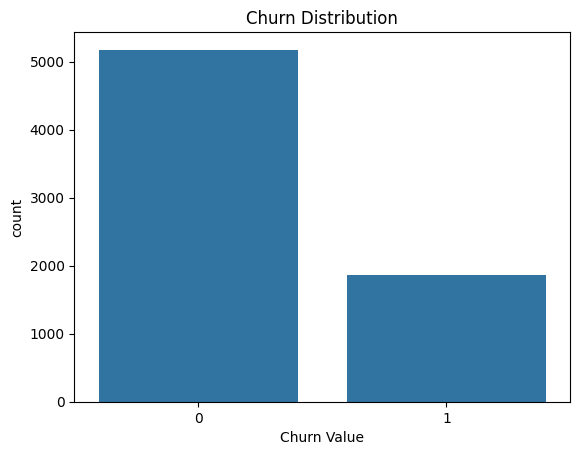

In [39]:
sns.countplot(x='Churn Value', data=df)
plt.title("Churn Distribution")
plt.show()


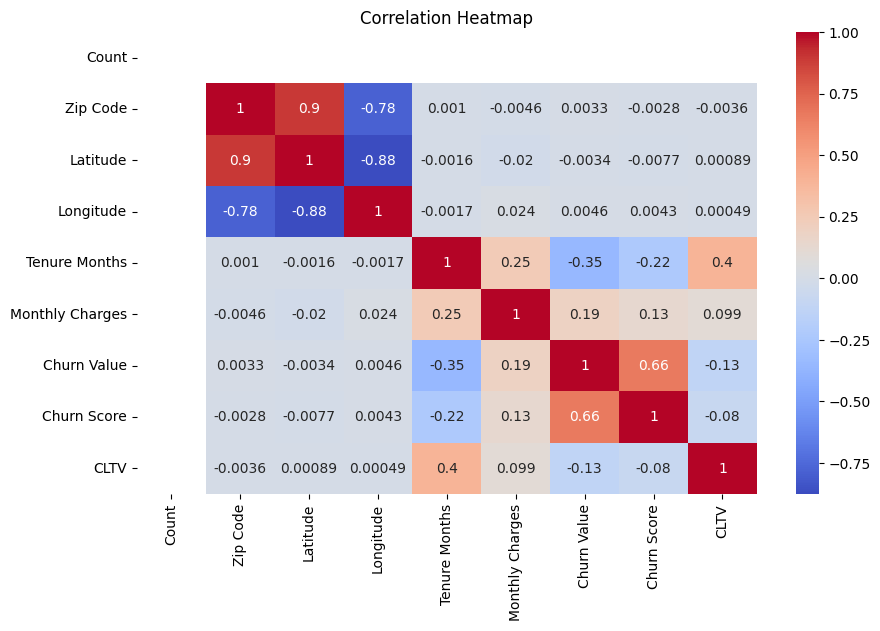

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


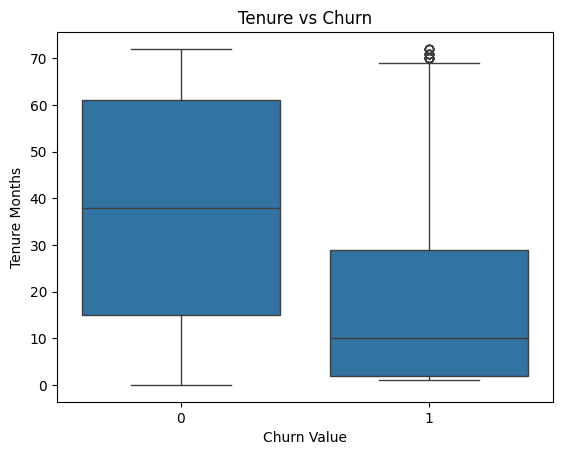

In [43]:
sns.boxplot(x='Churn Value', y='Tenure Months', data=df)
plt.title("Tenure vs Churn")
plt.show()

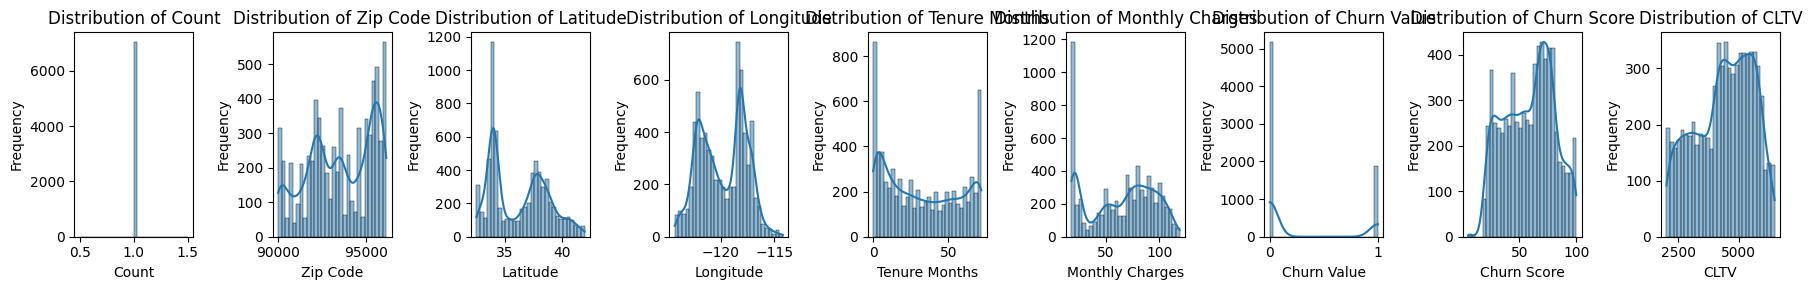

In [59]:
numerical_cols = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
        'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']

fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 3))
for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [60]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [65]:
df = df.drop(columns = ['CustomerID', 'Count', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'Churn Reason'])

from sklearn.preprocessing import OneHotEncoder
cat_cols = []
for cat in df.select_dtypes(include='object'):
    cat_cols.append(cat)
df_encoded = pd.get_dummies(df, cat_cols)
df_encoded.head()

C:\Users\pawan\AppData\Local\Temp\ipykernel_13896\1197891016.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for cat in df.select_dtypes(include='object'):


,Zip Code,Tenure Months,Monthly Charges,Churn Value,CLTV,Country_United States,State_California,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,City_Alta,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple Valley,City_Applegate,City_Aptos,City_Arbuckle,City_Arcadia,City_Arcata,City_Armona,City_Arnold,City_Aromas,City_Arroyo Grande,City_Artesia,City_Arvin,City_Atascadero,City_Atherton,City_Atwater,City_Auberry,City_Auburn,City_Avalon,City_Avenal,City_Avery,City_Avila Beach,City_Azusa,City_Badger,City_Baker,City_Bakersfield,City_Baldwin Park,City_Ballico,City_Bangor,City_Banning,City_Barstow,City_Bass Lake,City_Bayside,City_Beale Afb,City_Beaumont,City_Bell,City_Bella Vista,City_Bellflower,City_Belmont,City_Belvedere Tiburon,City_Ben Lomond,City_Benicia,City_Benton,City_Berkeley,City_Berry Creek,City_Bethel Island,City_Beverly Hills,City_Bieber,City_Big Bar,City_Big Bear City,City_Big Bear Lake,City_Big Bend,City_Big Creek,City_Big Oak Flat,City_Big Pine,City_Big Sur,City_Biggs,City_Biola,City_Birds Landing,City_Bishop,City_Blairsden Graeagle,City_Blocksburg,City_Bloomington,City_Blue Lake,City_Blythe,City_Bodega,City_Bodega Bay,City_Bodfish,City_Bolinas,City_Bonita,City_Bonsall,City_Boonville,City_Boron,City_Borrego Springs,City_Boulder Creek,City_Boulevard,City_Bradley,City_Branscomb,City_Brawley,City_Brea,City_Brentwood,City_Bridgeport,City_Bridgeville,City_Brisbane,City_Brookdale,City_Brooks,City_Browns Valley,City_Brownsville,City_Buellton,City_Buena Park,City_Burbank,City_Burlingame,City_Burney,City_Burnt Ranch,City_Burson,City_Butte City,City_Buttonwillow,City_Byron,City_Cabazon,City_Calabasas,City_Calexico,City_Caliente,City_California City,City_California Hot Springs,City_Calimesa,City_Calipatria,City_Calistoga,City_Callahan,City_Calpine,City_Camarillo,City_Cambria,City_Camino,City_Camp Nelson,City_Campbell,City_Campo,City_Campo Seco,City_Camptonville,City_Canby,City_Canoga Park,City_Cantua Creek,City_Canyon Country,City_Canyon Dam,City_Capay,City_Capistrano Beach,City_Capitola,City_Cardiff By The Sea,City_Carlotta,City_Carlsbad,City_Carmel,City_Carmel By The Sea,City_Carmel Valley,City_Carmichael,City_Carnelian Bay,City_Carpinteria,City_Carson,City_Caruthers,City_Casmalia,City_Caspar,City_Cassel,City_Castaic,City_Castella,City_Castro Valley,City_Castroville,City_Cathedral City,City_Catheys Valley,City_Cayucos,City_Cazadero,City_Cedar Glen,City_Cedarville,City_Ceres,City_Cerritos,City_Challenge,City_Chatsworth,City_Chester,City_Chico,City_Chilcoot,City_Chino,City_Chino Hills,City_Chowchilla,City_Chualar,City_Chula Vista,City_Citrus Heights,City_Claremont,City_Clarksburg,City_Clayton,City_Clearlake,City_Clearlake Oaks,City_Clements,City_Clio,City_Clipper Mills,City_Cloverdale,City_Clovis,City_Coachella,City_Coalinga,City_Coarsegold,City_Cobb,City_Coleville,City_Colfax,City_Colton,City_Columbia,City_Colusa,City_Comptche,City_Compton,City_Concord,City_Cool,City_Copperopolis,City_Corcoran,City_Corning,City_Corona,City_Corona Del Mar,City_Coronado,City_Corte Madera,City_Costa Mesa,City_Cotati,City_Cottonwood,City_Coulterville,City_Courtland,City_Covelo,City_Covina,City_Crescent City,City_Crescent Mills,City_Cressey,City_Crestline,City_Creston,City_Crockett,City_Crows Landing,City_Culver City,City_Cupertino,City_Cutler,City_Cypress,City_Daggett,City_Daly City,City_Dana Point,City_Danville,City_Darwin,City_Davenport,City_Davis,City_Davis Creek,City_Death Valley,City_Deer Park,City_Del Mar,City_Del Rey,City_Delano,City_Delhi,City_Denair,City_Descanso,City_Desert Center,City_Desert Hot Springs,City_Diamond Bar,City_Diamond Springs,City_Dillon Beach,City_Dinuba,City_Dixon,City_Dobbins,City_Dorris,City_Dos

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x = df_encoded.drop(columns=['Churn Value'])
y = df_encoded['Churn Value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]  
print(y_pred)
print(y_pred_proba)

[0 0 0 ... 0 0 0]
[0.37106674 0.27698355 0.16815952 ... 0.3181252  0.18079491 0.41592139]
